<a href="https://colab.research.google.com/github/manalibhoir22/TSF-Tasks/blob/main/VADER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,1,A30TL5EWN6DFXT,120401325X,christina,"[0, 0]",They look good and stick good! I just don't li...,4,Looks Good,1400630400,"05 21, 2014"
1,2,ASY55RVNIL0UD,120401325X,emily l.,"[0, 0]",These stickers work like the review says they ...,5,Really great product.,1389657600,"01 14, 2014"
2,3,A2TMXE2AFO7ONB,120401325X,Erica,"[0, 0]",These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1403740800,"06 26, 2014"
3,4,AWJ0WZQYMYFQ4,120401325X,JM,"[4, 4]",Item arrived in great time and was in perfect ...,4,Cute!,1382313600,"10 21, 2013"
4,5,ATX7CZYFXI1KW,120401325X,patrice m rogoza,"[2, 3]","awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1359849600,"02 3, 2013"


In [32]:
import numpy as np
import pandas as pd
import string
import nltk 
from nltk.corpus import stopwords
from nltk import PorterStemmer
import re
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer



## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
#XGB and TFIDF VECTORIZER:

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from sklearn.dummy import DummyClassifier
import numpy as np
import pandas as pd

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df.drop(df.columns[[0,1,3,4,8,9]],axis=1,inplace=True)
df.head()

,asin,reviewText,overall,summary
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good
1,120401325X,These stickers work like the review says they ...,5,Really great product.
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s


In [3]:
df.isnull().sum()

asin           0
reviewText    99
overall        0
summary        1
dtype: int64

In [4]:
# Check for whitespace strings (it's OK if there aren't any!):
blanks = []  # start with an empty list

for i,asin,rv,ov,summ in df.itertuples():  # iterate over the DataFrame
    if type(rv)==str:            # avoid NaN values
        if rv.isspace():         # test 'review' for whitespace
            blanks.append(i)     # add matching index numbers to the list
    
    if type(summ)==str:
        if summ.isspace():
            blanks.append(i)
        
len(blanks)

0

In [5]:
df.dropna(inplace=True)

In [6]:
df['reviewText']=df['reviewText'].apply(str)
df.head()

,asin,reviewText,overall,summary
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good
1,120401325X,These stickers work like the review says they ...,5,Really great product.
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s


In [7]:
#df.isnull().sum()

In [8]:
import string
import nltk 
from nltk.corpus import stopwords
from nltk import PorterStemmer
import re
from nltk.tokenize import word_tokenize

In [9]:
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

stop_words = ['in','of','at','a','the','and','is','on','an','they','was','it','i','them','to','these','this']

def decontracted(phrase):
    phrase=re.sub(r"won't","will not",phrase)
    phrase=re.sub(r"can't","can not",phrase)
    phrase=re.sub(r"n\'t"," not",phrase)
    phrase=re.sub(r"\'re"," are",phrase)
    phrase=re.sub(r"\'s"," is",phrase)
    phrase=re.sub(r"\'d"," would",phrase)
    phrase=re.sub(r"\'ll"," will",phrase)    
    phrase=re.sub(r"\'t"," not",phrase)
    phrase=re.sub(r"\'ve"," have",phrase)
    phrase=re.sub(r"\'m"," am",phrase)
    return phrase

In [14]:
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer 
import nltk
nltk.download('wordnet')

##STEMMING USING SNOWBALL
snow_stemmer = SnowballStemmer(language='english')

#LEMMATIZATION
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [15]:
def clean_text(text):
    
    snow_stemmer = SnowballStemmer(language='english')
    
    lemmatizer = WordNetLemmatizer()
    
    text = decontracted(text)
    
    text = deEmojify(text) #remove Emojis
    
    text_cleaned = "".join([x for x in text if x not in string.punctuation]) #remove punctuation
    
    text_cleaned = re.sub(' +', ' ',text_cleaned) #remove extra spaces
    
    text_cleaned = text_cleaned.lower() #converting into lower case
    
    tokens = text_cleaned.split(" ")
    
    tokens = [token for token in tokens if token not in stop_words] #taking only those words which are not stop words 
    
    text_cleaned = " ".join([snow_stemmer.stem(token) for token in tokens])
    
    text_cleaned = " ".join([lemmatizer.lemmatize(token) for token in tokens])
    
    return text_cleaned

In [16]:
df['cleaned_reviews']=df['reviewText'].apply(lambda x:clean_text(x))
df.head()

,asin,reviewText,overall,summary,sentiment,cleaned_reviews
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,1,look good stick good just do not like rounded ...
1,120401325X,These stickers work like the review says they ...,5,Really great product.,1,sticker work like review say do stick great st...
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1,are awesome make my phone look so stylish have...
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,1,item arrived great time perfect condition howe...
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1,awesome stay look great can be used multiple a...


In [17]:
def sentiment(n):
    return 1 if n >= 4 else 0
df['sentiment'] = df['overall'].apply(sentiment)
df.head()

,asin,reviewText,overall,summary,sentiment,cleaned_reviews
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,1,look good stick good just do not like rounded ...
1,120401325X,These stickers work like the review says they ...,5,Really great product.,1,sticker work like review say do stick great st...
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1,are awesome make my phone look so stylish have...
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,1,item arrived great time perfect condition howe...
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1,awesome stay look great can be used multiple a...


In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
df['sentiment'].value_counts()

1    148575
0     45764
Name: sentiment, dtype: int64

In [21]:
sid.polarity_scores(df.loc[0]['cleaned_reviews'])

{'compound': -0.1078, 'neg': 0.219, 'neu': 0.606, 'pos': 0.176}

In [22]:
df.loc[0]['sentiment']

1

In [23]:
df['scores'] = df['cleaned_reviews'].apply(lambda review: sid.polarity_scores(review))

df.head()

,asin,reviewText,overall,summary,sentiment,cleaned_reviews,scores
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,1,look good stick good just do not like rounded ...,"{'neg': 0.219, 'neu': 0.606, 'pos': 0.176, 'co..."
1,120401325X,These stickers work like the review says they ...,5,Really great product.,1,sticker work like review say do stick great st...,"{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'comp..."
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1,are awesome make my phone look so stylish have...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp..."
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,1,item arrived great time perfect condition howe...,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp..."
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1,awesome stay look great can be used multiple a...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp..."


In [24]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,asin,reviewText,overall,summary,sentiment,cleaned_reviews,scores,compound
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,1,look good stick good just do not like rounded ...,"{'neg': 0.219, 'neu': 0.606, 'pos': 0.176, 'co...",-0.1078
1,120401325X,These stickers work like the review says they ...,5,Really great product.,1,sticker work like review say do stick great st...,"{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'comp...",0.9136
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1,are awesome make my phone look so stylish have...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.8481
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,1,item arrived great time perfect condition howe...,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.9584
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1,awesome stay look great can be used multiple a...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9035


In [25]:
df['comp_score'] = df['compound'].apply(lambda c: 1 if c >=0 else 0)

df.head()

,asin,reviewText,overall,summary,sentiment,cleaned_reviews,scores,compound,comp_score
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,1,look good stick good just do not like rounded ...,"{'neg': 0.219, 'neu': 0.606, 'pos': 0.176, 'co...",-0.1078,0
1,120401325X,These stickers work like the review says they ...,5,Really great product.,1,sticker work like review say do stick great st...,"{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'comp...",0.9136,1
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1,are awesome make my phone look so stylish have...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.8481,1
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,1,item arrived great time perfect condition howe...,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.9584,1
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1,awesome stay look great can be used multiple a...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9035,1


In [35]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

y_test = df['sentiment']
y_pred = df['comp_score']

In [36]:
accuracy_score(df['sentiment'],df['comp_score'])

0.7979252749062206

In [37]:
print(classification_report(df['sentiment'],df['comp_score']))

              precision    recall  f1-score   support

           0       0.63      0.35      0.45     45764
           1       0.82      0.94      0.88    148575

    accuracy                           0.80    194339
   macro avg       0.73      0.64      0.66    194339
weighted avg       0.78      0.80      0.78    194339



In [29]:
pd.DataFrame(metrics.confusion_matrix(df['sentiment'],df['comp_score']),index = ['neg','pos'],columns= ['neg','pos'])

,neg,pos
neg,16030,29734
pos,9537,139038


In [30]:
df.head()

,asin,reviewText,overall,summary,sentiment,cleaned_reviews,scores,compound,comp_score
0,120401325X,They look good and stick good! I just don't li...,4,Looks Good,1,look good stick good just do not like rounded ...,"{'neg': 0.219, 'neu': 0.606, 'pos': 0.176, 'co...",-0.1078,0
1,120401325X,These stickers work like the review says they ...,5,Really great product.,1,sticker work like review say do stick great st...,"{'neg': 0.0, 'neu': 0.524, 'pos': 0.476, 'comp...",0.9136,1
2,120401325X,These are awesome and make my phone look so st...,5,LOVE LOVE LOVE,1,are awesome make my phone look so stylish have...,"{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'comp...",0.8481,1
3,120401325X,Item arrived in great time and was in perfect ...,4,Cute!,1,item arrived great time perfect condition howe...,"{'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'comp...",0.9584,1
4,120401325X,"awesome! stays on, and looks great. can be use...",5,leopard home button sticker for iphone 4s,1,awesome stay look great can be used multiple a...,"{'neg': 0.0, 'neu': 0.556, 'pos': 0.444, 'comp...",0.9035,1


In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.tab20):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

def disp_confusion_matrix(y_pred, model_name):
    """
    Display confusion matrix for selected model with TF-IDF Vectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    plot = plot_confusion_matrix(cm, classes=['Negative','Positive'], normalize=False, 
                                 title = model_name + " "+ '\nConfusion Matrix')
    plt.show()

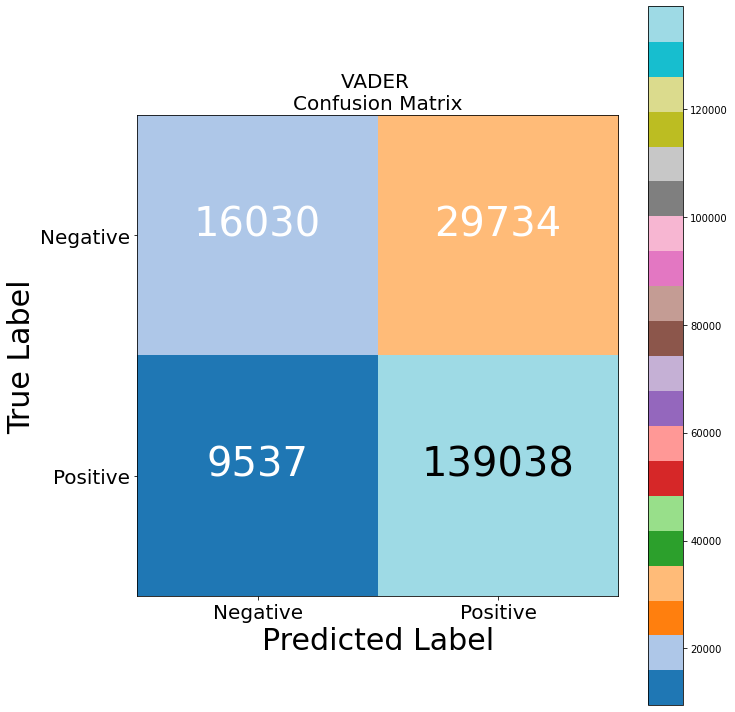

In [38]:
disp_confusion_matrix(y_pred, "VADER")

In [39]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['Negative or "0"', 'Positive or "1"', 'average']
    df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['model'] = label
    df = df[[ 'model', 'accuracy', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [40]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index([ 'model', 'accuracy', 'class'])

In [41]:
comparison_table(y_preds = [y_pred], 
                labels = ['VADER'])

In [42]:
df_tv2

precision    recall  f1-score   support
model accuracy class                                                   
VADER 0.797925 Negative or "0"   0.626980  0.350275  0.449454   45764.0
               Positive or "1"   0.823821  0.935810  0.876252  148575.0
               average           0.777468  0.797925  0.775747  194339.0

ValueError: ignored

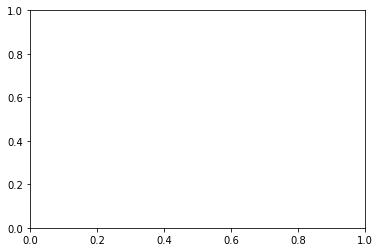

In [46]:
#Graph Plotting Code:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple
n_groups = 2
score_vader = (84.62,84.43,84.62,82.72)
score_sentiwordnet = (88.92,88.57,88.92,88.53)

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.1
opacity = 0.7
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index,score_vader, bar_width,
 alpha=opacity, color='blue',
 error_kw = error_config,
 label='VADER')

z=index + bar_width
rects2 = ax.bar(z, score_sentiwordnet, bar_width,
 alpha=opacity, color='gold',
 error_kw=error_config,
 label='SentiWordNet')




ax.set_xlabel('\n Evaluating Measures',fontsize = 17)
ax.set_ylabel('Performance (in %) \n',fontsize = 17)
ax.set_title('Performance of Lexicon Classifiers',fontsize=20)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Accuracy', 'Precision', 'Recall','F1-Score'),fontsize = 14)
ax.set_yticklabels((0,20,40,60,80),fontsize = 15)
ax.legend(bbox_to_anchor=(1.03, 1.0), borderaxespad=0)
fig.set_size_inches(12,8)
fig.tight_layout()
plt.show()